In [1]:
dia_diem_muon_den = ["Biển", "Núi", "Thành phố"]
muc_thu_nhap = ["Dưới 5 triệu", "5-15 triệu", "15-30 triệu", "Trên 30 triệu"]
thoi_gian = ["Xuân", "Hè", "Thu", "Đông"]
muc_dich_du_lich = ["Khám phá thiên nhiên", "Tìm hiểu lịch sử", "Tìm hiểu văn hóa", "Tâm linh", "Trải nghiệm", "Nghỉ mát"]
so_luong_nguoi = ['Một mình', 'Cặp đôi', 'Nhóm 3-5', 'Nhóm 6-10', 'Hơn 10 người']
dia_diem = ["Bãi biển Mỹ Khê", "Cầu Rồng", "Ngũ Hành Sơn", "Bà Nà Hills", "Chùa Linh Ứng", "Cầu Thuận Phước", "Bãi biển Non Nước", "Sông Hàn", "Làng Đá Mỹ Đức", "Công viên Châu Á", "Bảo tàng Chăm", "Bãi biển An Bàng", "Công viên Biển Đông", "Vinpearl Land Nam Hội An", "Quảng trường Trung tâm", "Bảo tàng Đà Nẵng", "Công viên 29/3", "Khu du lịch sinh thái Cồn Ngọc", "Bãi biển Đá Ông Địa", "Hội An"]

d:\Apps\Miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.799


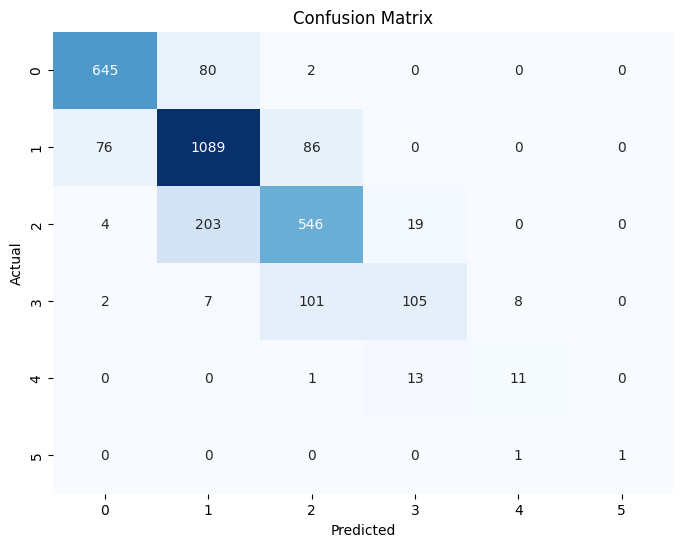

['encoder.joblib']

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
data = pd.read_excel('data.xlsx')

# Chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm thử
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Xác định các features và target
X_train = train_data[['Địa hình', 'Mức thu nhập', 'Số lượng người', 'Thời gian', 'Mục đích du lịch', 'Địa điểm']]
y_train = train_data['Đánh giá']
X_test = test_data[['Địa hình', 'Mức thu nhập', 'Số lượng người', 'Thời gian', 'Mục đích du lịch', 'Địa điểm']]
y_test = test_data['Đánh giá']

# Tạo và huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier(random_state=42)
encoder = OneHotEncoder(drop='first', sparse=False)

# Mã hóa dữ liệu huấn luyện
X_train_encoded = encoder.fit_transform(X_train)

# Huấn luyện mô hình
model.fit(X_train_encoded, y_train)

# Dự đoán trên dữ liệu kiểm thử
X_test_encoded = encoder.transform(X_test)
predictions = model.predict(X_test_encoded)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Tính ma trận lỗi
cm = confusion_matrix(y_test, predictions)

# Tạo DataFrame từ ma trận lỗi
cm_df = pd.DataFrame(cm)

# Vẽ heatmap cho ma trận lỗi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Lưu mô hình và encoder để sử dụng sau này
joblib.dump(model, 'Models/model.joblib')
joblib.dump(encoder, 'Models/encoder.joblib')


In [3]:
# Load mô hình đã được huấn luyện
loaded_model = joblib.load('Models/model.joblib')
loaded_encoder = joblib.load('Models/encoder.joblib')

In [4]:
results = pd.DataFrame(columns=["Địa hình","Mức thu nhập", "Số lượng người", "Thời gian", "Mục đích du lịch","Địa điểm", "Đánh giá"])

# Dự đoán trên dữ liệu mới
for i in dia_diem:
    new_data = pd.DataFrame({
        'Địa hình': ['Núi'],
        'Mức thu nhập': ['Dưới 5 triệu'],
        'Số lượng người': ['Một mình'],
        'Thời gian': ['Hè'],
        'Mục đích du lịch': ['Trải nghiệm'],
        'Địa điểm': [i],
    })

    # Mã hóa dữ liệu mới
    new_data_encoded = loaded_encoder.transform(new_data)

    # Dự đoán trên dữ liệu mới
    new_predictions = loaded_model.predict(new_data_encoded)

    # In dự đoán
    new_data['Đánh giá'] = new_predictions[0]
    results = pd.concat([results, new_data], ignore_index=True)
results = results.sort_values(by='Đánh giá', ascending=False)
results['Địa điểm'].head(3).to_list



<bound method IndexOpsMixin.tolist of 0                    Bãi biển Mỹ Khê
6                  Bãi biển Non Nước
17    Khu du lịch sinh thái Cồn Ngọc
Name: Địa điểm, dtype: object>